In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

df = pd.read_csv("eval_ckpt900.csv")
df

,i,pos0,pos1,pos2,pos3,pos4,pos5,pos6,vel0,vel1,...,obs6,obs7,obs8,obs9,obs10,obs11,obs12,obs13,obs14,obs15
0,0,-0.000154,-0.000004,0.079487,0.078447,-0.410382,0.016915,3.924089,-0.029354,-0.000868,...,-0.158109,0.014393,-0.293537,-0.008684,-0.975760,-0.057450,0.392409,-0.64053,-0.767933,0.0
1,1,-0.000440,-0.000013,0.077999,0.079698,-0.419531,0.018630,3.896054,-0.027882,-0.000920,...,-0.150631,0.013731,-0.278818,-0.009201,-1.951676,-0.054825,0.389605,-0.64053,-0.767933,0.0
2,2,-0.000712,-0.000023,0.075535,0.080948,-0.428250,0.020284,3.869296,-0.026486,-0.000961,...,-0.143546,0.013091,-0.264857,-0.009613,-2.928304,-0.052332,0.386930,-0.64053,-0.767933,0.0
3,3,-0.000969,-0.000033,0.072093,0.082192,-0.436557,0.021879,3.843753,-0.025162,-0.000993,...,-0.136832,0.012474,-0.251618,-0.009931,-3.905565,-0.049962,0.384375,-0.64053,-0.767933,0.0
4,4,-0.001287,-0.000054,0.069000,0.083546,-0.444581,0.023755,3.811782,-0.051433,-0.005277,...,-0.143811,0.030820,-0.514326,-0.052767,0.222609,-0.106714,0.381178,-0.64053,-0.767933,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,2.462898,-4.367093,0.049032,-1.115045,0.164745,2.243118,-206.866013,0.267277,-1.275493,...,0.766602,-1.951345,2.672768,-12.754927,-0.875271,-0.708215,-20.686602,0.99686,0.079190,0.0
1996,1996,2.465944,-4.379465,0.048198,-0.925572,0.275136,2.228274,-207.152557,0.338168,-1.197036,...,0.734828,-1.460757,3.381684,-11.970358,-0.777574,-0.447935,-20.715256,0.99686,0.079190,0.0
1997,1997,2.469260,-4.389568,0.049473,-0.753527,0.353369,2.218331,-207.289474,0.350549,-0.932163,...,0.732296,-0.808398,3.505494,-9.321632,1.999159,-0.136162,-20.728949,0.99686,0.079190,0.0
1998,1998,2.473232,-4.398638,0.051762,-0.616003,0.405048,2.217618,-207.285095,0.442584,-0.894726,...,0.579679,-0.324626,4.425836,-8.947263,2.567619,0.139848,-20.728510,0.99686,0.079190,0.0


In [28]:
cmd = np.array([df['obs13'], df['obs14']]).T
linvel = np.array([df['vel0'], df['vel1']]).T
# /*************  ✨ Codeium Command ⭐  *************/
df['alignedvel'] = np.einsum('ij,ij->i', cmd, linvel)
df['alignedvel']

0       0.019469
1       0.018566
2       0.017703
3       0.016880
4       0.036996
          ...   
1995    0.165431
1996    0.242313
1997    0.275630
1998    0.370340
1999    0.470831
Name: alignedvel, Length: 2000, dtype: float64

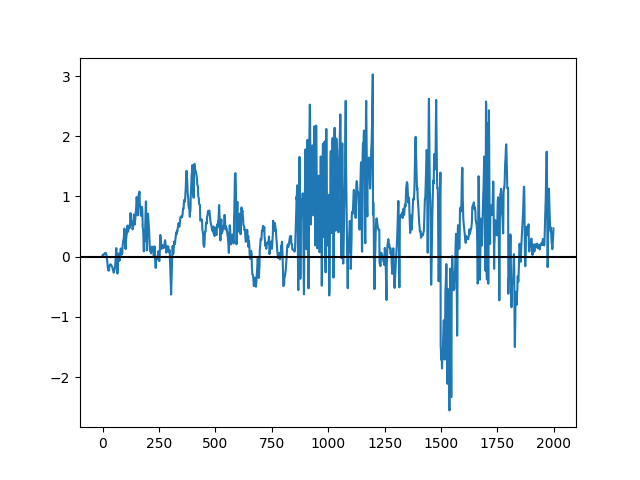

In [38]:
plt.figure()
plt.plot(df['i'], df['alignedvel'])
plt.axhline(0, color='k')


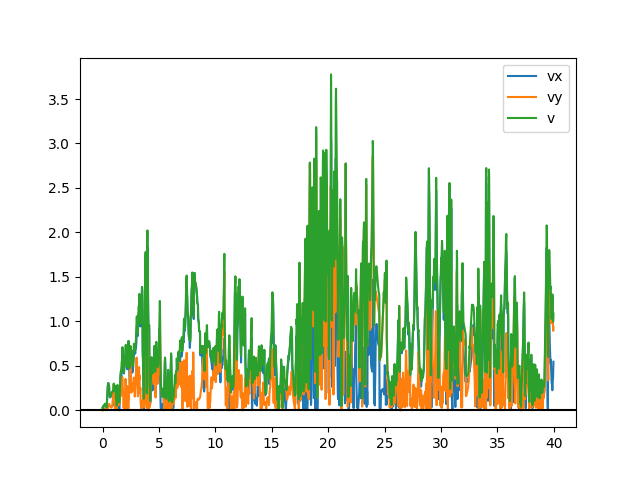

In [37]:
velnorm = np.linalg.norm(linvel, axis=1)
plt.figure()
plt.plot(df['i']*2/100., np.abs(linvel[:,0]), label='vx')
plt.plot(df['i']*2/100., np.abs(linvel[:,1]), label='vy')
plt.plot(df['i']*2/100., velnorm, label='v')
plt.axhline(0, color='k')
plt.legend()

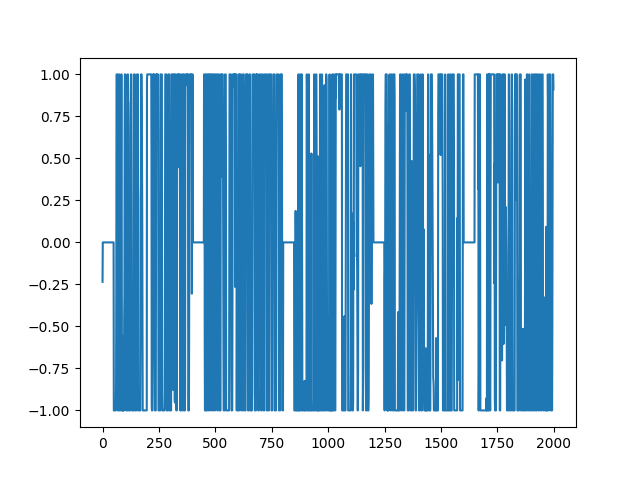

In [39]:
plt.figure()
plt.plot(df['i'], np.clip(df['action'], a_min=-1, a_max=1))